# Online Shoppers Intention Behaviour Analysis

## 1. Business Problem

A company that operates an e-commerce store is interested in increasing its online sales and improving its conversion rate. To achieve this goal, they have decided to analyze their customers' online shopping behavior and identify the factors that influence purchasing decisions. They have provided a dataset that contains information about each customer's session on their website, including the pages they visited, the duration of their visits, and whether or not they completed a purchase.

The main objective revolved around the identification of key metrics which contributes the most towards predicting a shopper's behavior and to suggest prioritized critical recommendations and performance improvements on the same. Revenue is the attribute of interest which identifies if a purchase was made or not.

The company has asked for an analysis of this dataset that can provide insights into the following questions:

1. How do the pages browsing habits and preferences of shoppers who successfully complete a purchase differ from those who do not?
2. What are the common characteristics of users who are more likely to convert?
3. How do special days,holidays and seasons impact purchasing behavior, and how can the company adjust its marketing strategy to take advantage of these events?

Based on the results of this analysis, the company hopes to optimize its website layout and design, refine its marketing campaigns, and increase its online sales and revenue.

### 1.1 Data Origin

The dataset used in this analysis is sourced from the Online Shoppers Purchasing Intention data set, which is available on the UC Irvine Machine Learning Repository. The data set was constructed to ensure that each session corresponds to a distinct user within a 1-year timeframe.

### 1.2 Columns Meaning

**Administrative**: This is the number of pages of this type (administrative) that the user visited.

**Administrative_Duration**: This is the amount of time spent in this category of pages (in seconds).

**Informational**: This is the number of pages of this type (informational) that the user visited.

**Informational_Duration**: This is the amount of time spent in this category of pages (in seconds).

**ProductRelated**: This is the number of pages of this type (product related) that the user visited.

**ProductRelated_Duration**: This is the amount of time spent in this category of pages (in seconds).

**BounceRates**: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

**ExitRates**: The percentage of pageviews on the website that end at that specific page.

**PageValues**: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

**SpecialDay**: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

**Month**: Contains the month the pageview occurred, in string form. The store didn't work in April due to undefined reasons.

**OperatingSystems**: An integer value representing the operating system that the user was on when viewing the page.

**Browser**: An integer value representing the browser that the user was using to view the page.

**Region**: An integer value representing which region the user is located in.

**TrafficType**: An integer value representing what type of traffic the user is categorized into.

**VisitorType**: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

**Weekend**: A boolean representing whether the session is on a weekend.

**Revenue**: A boolean representing whether or not the user completed the purchase.


## 2. Data Preprocessing

### 2.1. Data Cleaning

Let's explore our dataset and it's columns and perform the neccessary data cleaning steps.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We don't have null entries in our dataset, all datatypes are correct and duplicate checking is irrelevant here, so we can proceed with the feature engineering.

### 2.2 Feature Engineering

In this section we'll create some new features that'll help in the future analysis:

1. Session duration: will be created by summing up the duration spent by a user on all the pages visited during a session. This feature can help answer questions such as "Do longer sessions indicate higher purchasing intention?" or "What is the optimal session duration for maximizing the probability of purchase?".

2. Pageviews per session: will be created by counting the number of pages visited by a user during a session. This feature can help answer questions such as "Is there a correlation between the number of pages visited and the probability of purchase?" or "What is the average number of pageviews per session for users who complete a purchase?".

3. Ratio of informational/administrative pages to product-related pages: will be created by dividing the number of informational pages visited by a user by the number of product-related pages visited. This feature can help answer questions such as "Are users who visit more informational/administrative pages more likely to make a purchase?" or "What is the optimal ratio of informational/administrative pages to product-related pages to maximize the probability of purchase?".

4. Average time per page: will be created by dividing the total time spent on all pages visited by a user during a session by the number of pages visited. This feature can help answer questions such as "Is there a correlation between the average time spent on a page and the probability of purchase?" or "What is the average time per page for users who complete a purchase?".

5. Seasonality: will be created by mapping the month column to a season, such as winter, spring, summer, or fall. This feature can help answer questions such as "Are users more likely to make a purchase during certain seasons?" or "Do purchasing patterns vary by season?".

In [6]:
data['Session_duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']
data['Pages_total'] = data['Administrative'] + data['Informational'] + data['ProductRelated']
data['Info_Product'] = data['Informational'] / data['ProductRelated']
data['Admin_Product'] = data['Administrative'] / data['ProductRelated']
data['Average_time'] = data['Session_duration'] / data['Pages_total'] 
data = data.replace([np.inf, -np.inf, np.nan], 0)

seasons = {
    'Dec': 'Winter',
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Fall',
    'Oct': 'Fall',
    'Nov': 'Fall'
}

data['Seasonality'] = data['Month'].map(seasons)



In [7]:
## I'll also transform all duration related columns to minutes (now it's in seconds, which will be not so comfortable during the data visualization phase)
duration_cols = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Session_duration', 'Average_time']

for col in duration_cols:
    data[col] = data[col] / 60


In [8]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,1.346977,0.503569,0.574540,31.731468,19.912437,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,21.833954,34.550203,0.021983,0.119687,0.629867
std,3.321784,2.946318,1.270156,2.345822,44.475503,31.894488,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,33.963362,46.514053,0.117785,0.263877,0.723679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,3.068958,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,3.700000,8.000000,0.000000,0.000000,0.303808
50%,1.000000,0.125000,0.000000,0.000000,18.000000,9.982282,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,11.333333,20.000000,0.000000,0.021739,0.494865
75%,4.000000,1.554271,0.000000,0.000000,38.000000,24.402620,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,27.115139,42.000000,0.000000,0.133333,0.757020
max,27.000000,56.645833,24.000000,42.489583,705.000000,1066.225371,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1165.360787,746.000000,5.000000,4.000000,23.516667


The maximum value for the "Session duration" column is 1165 minutes, which definetely looks like a wrong entry, because it's very unlikely, that someone was browsing the website for 19.5 hours. Such outliers can negatively impact the future ML model training, hence I will delete any entries, where the session duration is longer than 480 minutes (8 hours).

In [9]:
data_original = data.copy()
data = data[data['Session_duration'] <= 480]

## 3. EDA

### 3.1 How the data is distributed?

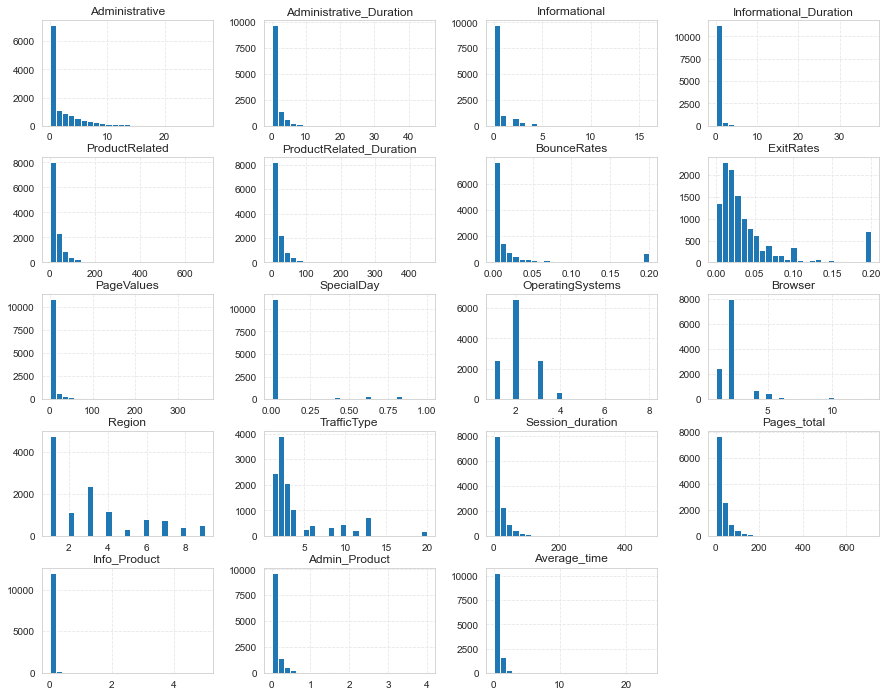

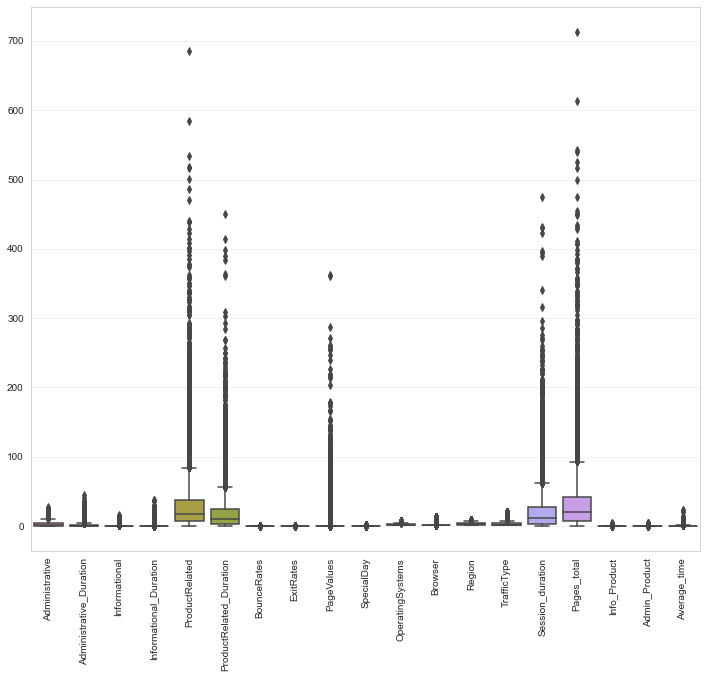

In [10]:
sns.set_style("whitegrid", {'grid.color': '.9', 'grid.linestyle': '--'})
data.hist(bins=25, figsize=(15,12))
plt.show()

plt.figure(figsize=(12,10))
ax = sns.boxplot(data=data.select_dtypes(include=[np.number]))
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Looks like all the numerical data is strongly right-skewed.

Some insights we can drawn here:

- Customers tend to visit the website more frequently around special days and holidays.
- Users spend the most time on product-related pages, followed by administrative pages and informational pages.
- The majority of website visitors use browsers 1-2 and operating system 1-3.
- The largest number of customers come from regions 1 and 3.

### 3.2. What are the common characteristics of users who are more likely to convert?

#### How many visitors end up buying something?

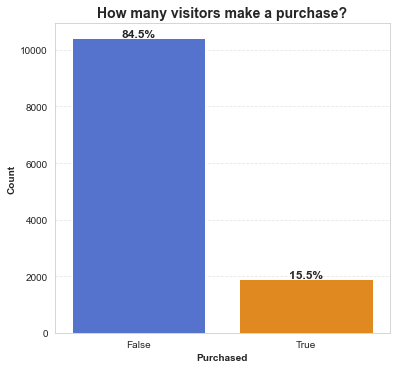

In [11]:
sns.countplot(data=data, x='Revenue', palette=['royalblue', 'darkorange'])
plt.title('How many visitors make a purchase?',  fontsize=14, fontweight='bold')
plt.xlabel('Purchased', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

total = len(data['Revenue'])
for p in plt.gca().patches:
    plt.gca().annotate(f"{100 * p.get_height()/total:.1f}%", 
                        (p.get_x() + p.get_width()/2 - 0.1, p.get_y() + p.get_height() + 40), size=12, fontweight='bold')

plt.subplots_adjust(top=1.2)
plt.show()

Only around 15% of online-shop visitors convert to the customers, the rest leave the website without a purchase.  A conversion rate of 15% is considered average for an e-commerce website, so there is a room for improvement.

#### What is the visitors distribution?

We can see that the shop's strategy of focusing on retaining customers is successful. The high percentage of returning visitors and their significant contribution to the number of purchases made suggests that the business has built a loyal customer base.

However, the fact that new visitors make more purchases than returning ones indicates the potential for growth in engaging returning visitors. The store could benefit from implementing special campaigns/promotions targeted towards returning visitors to increase their engagement and encourage repeat purchases.

It's important to note that the 'Other' visitor type is not clearly defined, the system may simply fail to classify those visitors.

Overall, the results suggest that the shop is performing well with customer retention and attracting new visitors, but it should also work on engaging returning visitors to increase the overall number of purchases.

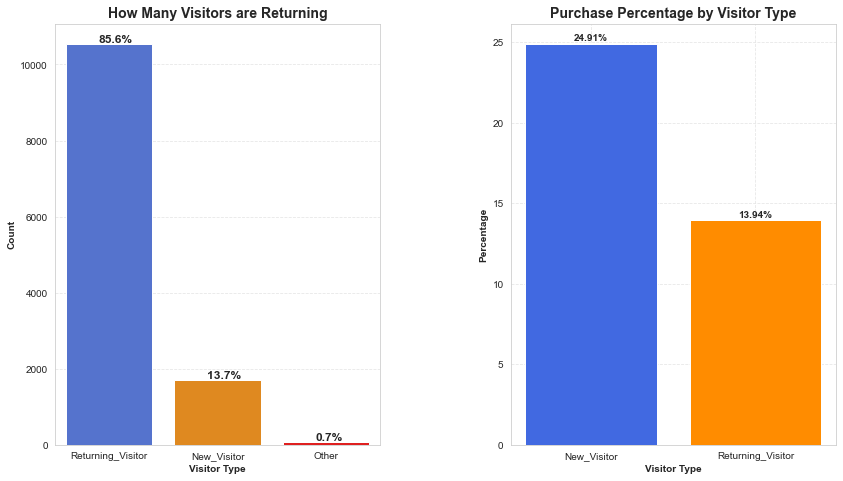

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

# 1st subplot
sns.countplot(data=data, x='VisitorType', palette=['royalblue', 'darkorange', 'red'], ax=ax1)
ax1.set_title('How Many Visitors are Returning', fontsize=14, fontweight='bold')
ax1.set_xlabel('Visitor Type', fontweight='bold')
ax1.set_ylabel('Count', fontweight='bold')

total = len(data['VisitorType'])
for p in ax1.patches:
    ax1.annotate(f"{100 * p.get_height()/total:.1f}%", 
                        (p.get_x() + p.get_width()/2 - 0.1, p.get_y() + p.get_height() + 40), size=12, fontweight='bold')

# 2nd subplot
visitors = data[data['VisitorType'] != 'Other']
counts = visitors.groupby(['VisitorType', 'Revenue']).size().unstack()
percentages = (counts.iloc[:,1] / counts.sum(axis=1)) * 100
ax2.bar(percentages.index, percentages, color=['royalblue', 'darkorange'])
for i, v in enumerate(percentages):
    ax2.text(i, v + 0.2, f'{v:.2f}%', ha='center', fontweight='bold')
    
ax2.set_title('Purchase Percentage by Visitor Type', fontsize=14, fontweight='bold')
ax2.set_xlabel('Visitor Type', fontweight='bold')
ax2.set_ylabel('Percentage', fontweight='bold')


plt.subplots_adjust(wspace=0.4, top=1.1)

# Show plot
plt.show()

#### What are the factors that influence revenue?

The charts present insights into the realtionships between revenue and various factors, such as operating system, browser, region, and traffic source.

- Operating system "2" emerged as the top performer for both website visitors and visitors who made a purchase, with "1" and "3" following closely behind. Visitors with systems 4-8 make less or no purchases at all, implying that the website might not be user-friendly for those systems or that they are not popular. 

- Similarly, browser "2" placed as the leading browser. 85% of the converted customers use browsers 1 and 2, while others generate small or no purchase rate at all. The same reasons as the operating system may be responsible for this trend. 

- The regional analysis shows that region "1" performed considerably better, with region "3" in second place. This suggests that marketing efforts in this region have been successful. However, there is scope for improvement in other regions that all bring less than 10% of purchases.

- Traffic type "2" brings 45% of customers, followed by "1" and "3" with a huge distance. This indicates the positive impact of Google SEO optimization for this traffic type. However, it's indicating room for improvement with SEO and/or Google/Social media Ads for the other traffic types. Overall, these findings can guide future marketing and website design strategies to increase revenue growth.

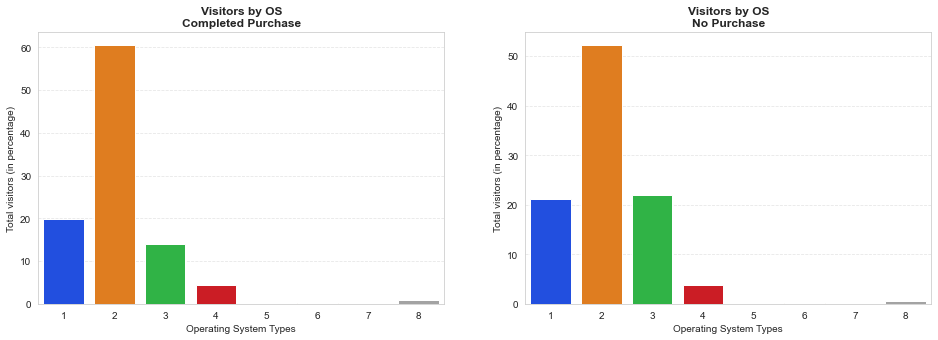

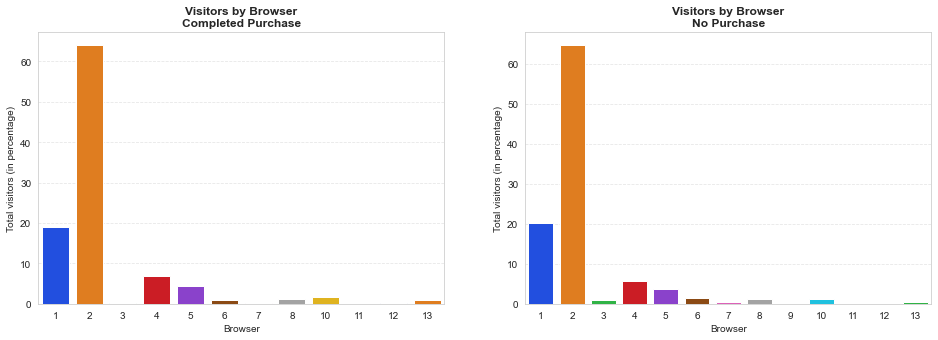

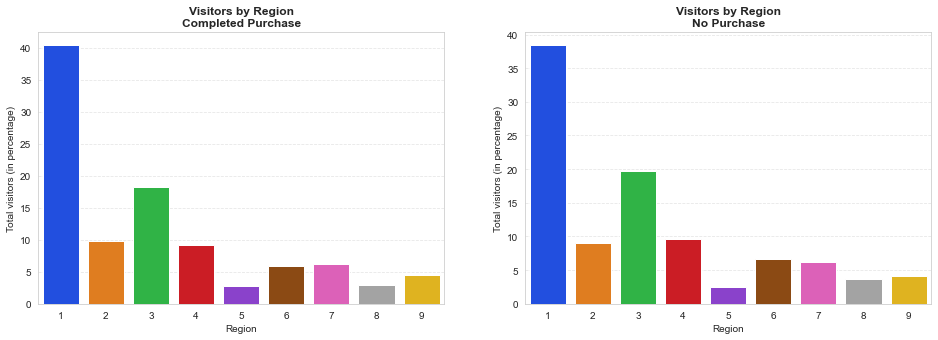

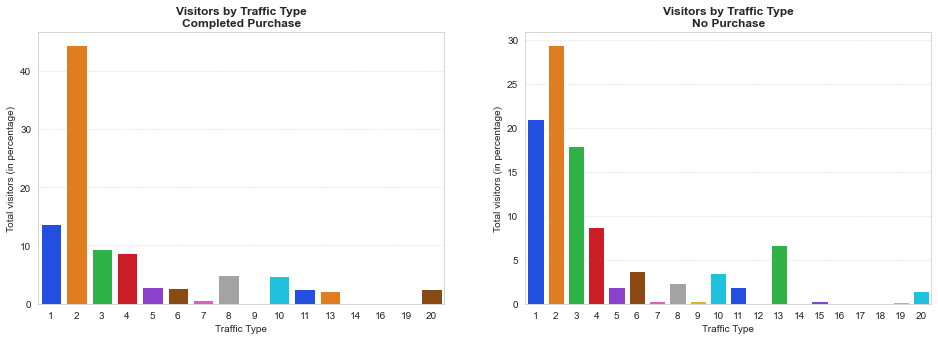

In [13]:
#OS and Revenue
trend = pd.DataFrame(data.groupby(['OperatingSystems', 'Revenue']).size()).reset_index()
trend.columns = ['OS', 'Revenue', 'Freq']
a = trend[trend['Revenue'] == 1].copy()
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 0].copy()
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
sns.barplot(x='OS', y='perc', data=a.sort_values('perc', ascending=False), palette= "bright", ax=ax1)
sns.barplot(x='OS', y='perc', data=b.sort_values('perc', ascending=False), palette= "bright", ax=ax2)
ax1.set(xlabel='Operating System Types', ylabel='Total visitors (in percentage)')
ax1.set_title('Visitors by OS\nCompleted Purchase', fontweight='bold')
ax2.set(xlabel='Operating System Types', ylabel='Total visitors (in percentage)')
ax2.set_title('Visitors by OS\nNo Purchase', fontweight='bold')

#Browser and Revenue
trend = pd.DataFrame(data.groupby(['Browser', 'Revenue']).size()).reset_index()
trend.columns = ['Browser', 'Revenue', 'Freq']
a = trend[trend['Revenue'] == 1].copy()
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 0].copy()
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
sns.barplot(x='Browser', y='perc', data=a.sort_values('perc', ascending=False), palette= "bright", ax=ax1)
sns.barplot(x='Browser', y='perc', data=b.sort_values('perc', ascending=False), palette= "bright", ax=ax2)
ax1.set(xlabel='Browser', ylabel='Total visitors (in percentage)')
ax1.set_title('Visitors by Browser\nCompleted Purchase', fontweight='bold')
ax2.set(xlabel='Browser', ylabel='Total visitors (in percentage)')
ax2.set_title('Visitors by Browser\nNo Purchase', fontweight='bold')

#Region and Revenue
trend = pd.DataFrame(data.groupby(['Region', 'Revenue']).size()).reset_index()
trend.columns = ['Region', 'Revenue', 'Freq']
a = trend[trend['Revenue'] == 1].copy()
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 0].copy()
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
sns.barplot(x='Region', y='perc', data=a.sort_values('perc', ascending=False), palette= "bright", ax=ax1)
sns.barplot(x='Region', y='perc', data=b.sort_values('perc', ascending=False), palette= "bright", ax=ax2)
ax1.set(xlabel='Region', ylabel='Total visitors (in percentage)')
ax1.set_title('Visitors by Region\nCompleted Purchase', fontweight='bold')
ax2.set(xlabel='Region', ylabel='Total visitors (in percentage)')
ax2.set_title('Visitors by Region\nNo Purchase', fontweight='bold')

#Traffic type and Revenue
trend = pd.DataFrame(data.groupby(['TrafficType', 'Revenue']).size()).reset_index()
trend.columns = ['TrafficType', 'Revenue', 'Freq']
a = trend[trend['Revenue'] == 1].copy()
a['perc'] = (a['Freq'] / a['Freq'].sum()) * 100
b = trend[trend['Revenue'] == 0].copy()
b['perc'] = (b['Freq'] / b['Freq'].sum()) * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
sns.barplot(x='TrafficType', y='perc', data=a.sort_values('perc', ascending=False), palette= "bright", ax=ax1)
sns.barplot(x='TrafficType', y='perc', data=b.sort_values('perc', ascending=False), palette= "bright", ax=ax2)
ax1.set(xlabel='Traffic Type', ylabel='Total visitors (in percentage)', title='Visitors by Traffic Type\nCompleted Purchase')
ax1.set_title('Visitors by Traffic Type\nCompleted Purchase', fontweight='bold')
ax2.set(xlabel='Traffic Type', ylabel='Total visitors (in percentage)')
ax2.set_title('Visitors by Traffic Type\nNo Purchase', fontweight='bold')

plt.show()


### 3.3 How do special days,holidays and seasons impact purchasing behavior?


#### Which seasons have the most orders?

Fall and spring are the busiest seasons for our online shop, while summer and winter have lower customer traffic. However, it's important to note that although spring has the highest number of visitors, the conversion rate is significantly lower than in fall, where visitors are more likely to make purchases.

One possible explanation for the low conversion rate in spring could be that the data only covers two months, as the website didn't work in April. Additionally, there may be various factors that influence customer behavior differently in different seasons, such as product popularity or the availability of promotions.

To address this issue, we should dive deeper into the reasons for the lower conversion rate in spring, summer and winter, and identify areas where we can improve. Conducting further market research may help better understand the preferences and needs of visitors during this season. By tailoring our marketing and sales strategies to the unique characteristics of each season, we can optimize our conversion rate and revenue, making the most of the traffic we receive throughout the year. 

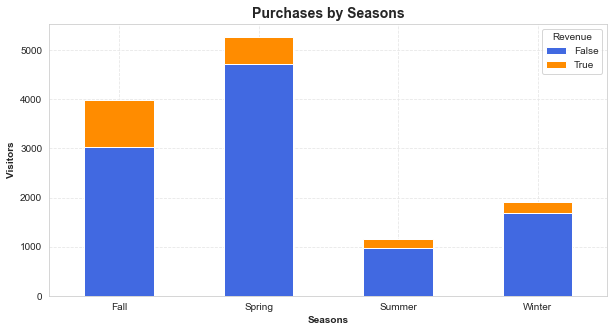

In [14]:
data.groupby('Seasonality')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5), color=['royalblue', 'darkorange'])
plt.title('Purchases by Seasons',  fontsize=14, fontweight='bold')
plt.xlabel('Seasons', fontweight='bold')
plt.ylabel('Visitors', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

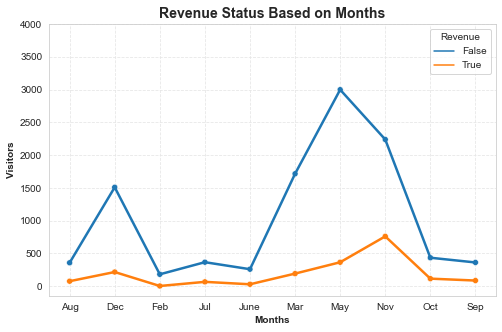

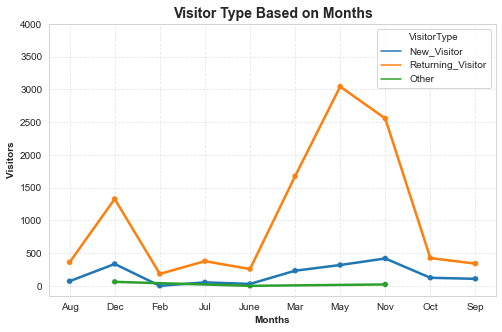

In [15]:
#revenue status based on months
trend1 = pd.DataFrame(data.groupby(['Month', 'Revenue']).size().reset_index(name='Frequency'))
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Frequency', hue='Revenue', data=trend1, linewidth=2.5)
sns.scatterplot(x='Month', y='Frequency', hue='Revenue', data=trend1, legend=False, sizes=[200])
plt.title('Revenue Status Based on Months', fontweight='bold', fontsize=14)
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Visitors', fontweight='bold')
plt.yticks(range(0, 4001, 500))
plt.show()

#visitor type based on months
trend2 = pd.DataFrame(data.groupby(['Month', 'VisitorType']).size().reset_index(name='Frequency'))
plt.figure(figsize=(8, 5))
sns.lineplot(x='Month', y='Frequency', hue='VisitorType', data=trend2, linewidth=2.5)
sns.scatterplot(x='Month', y='Frequency', hue='VisitorType', data=trend2, legend=False, sizes=[200])
plt.title('Visitor Type Based on Months', fontweight='bold', fontsize=14)
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Visitors', fontweight='bold')
plt.yticks(range(0, 4001, 500))
plt.show()


We can note that the most successful months in terms of the number of orders are December, March, May and November. This can be influenced by several factors such as the holiday season and promotions during these months, which encourages more people to make purchases. It's also important to note that while these months have the highest number of orders, they may not necessarily have the highest revenue. Therefore, we should focus on collecting and analyzing the revenue data to get a clearer picture of the overall performance of the business.


The graph showing purchases growth by seasonality reveals some interesting patterns. Customer engagement is particularly high during the months of February, March, and May, followed by a gradual decline. From June to October, the trend seems to stagnate, after which there is a surge in engagement as Black Friday approaches. However, despite high demand and engagement, there is a significant drop in conversion rates, indicating that many visitors to the website are not completing purchases. It's also important to note that while some have the highest number of orders, they may not necessarily have the highest revenue. Therefore, in the future we should focus on collecting and analyzing the revenue data to get a clearer picture of the overall performance of the business.

While the presence of a good loyalty program is suggested by the high number of returning customers, more attention is needed to improve the conversion rate. The data above highlights that many customers are browsing the website but not taking the next step to make a purchase. 

#### Is there an increase in shopping closer to holidays?

It's pretty intersting that while there is a higher number of purchases made during months that include major holidays such as December, March, May, and November, the conversion rate goes lower as the holidays get closer. Usually people tend to shop more when the holidays are close, so it could mean that the customers maybe choose other shops to make a purchase. A reason for that could be that the competitors may have better promotions, more attractive prices, etc. The strategy for the holiday sales should be reviewed and adjusted to be more attractive for the customers. 

Text(0.5, 1.0, 'Impact of Special Days on Conversion Rate')

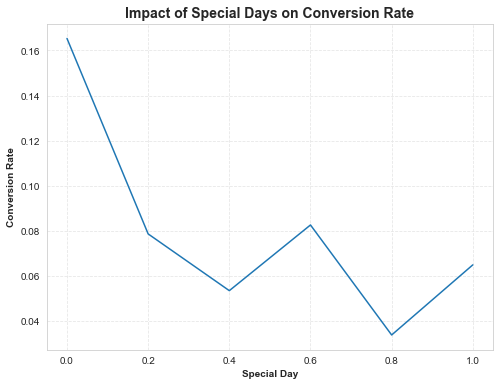

In [16]:
special_day_agg = data.groupby(['SpecialDay', 'Revenue']).size().reset_index(name='Count')

# Calculate the conversion rate for each special day
conversion_rate = special_day_agg.pivot(index='SpecialDay', columns='Revenue', values='Count').reset_index()
conversion_rate['Conversion_Rate'] = conversion_rate[True] / (conversion_rate[True] + conversion_rate[False])

plt.figure(figsize=(8, 6))
plt.plot(conversion_rate['SpecialDay'], conversion_rate['Conversion_Rate'])
plt.xlabel('Special Day', fontweight='bold')
plt.ylabel('Conversion Rate', fontweight='bold')
plt.title('Impact of Special Days on Conversion Rate', fontweight='bold',fontsize=14)

#### Do people shop more on weekends or weekdays?

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

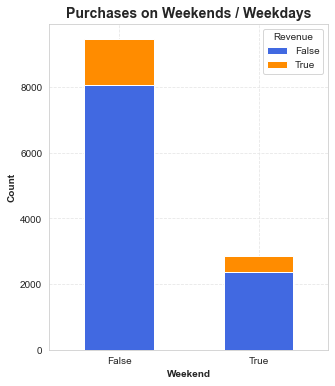

In [17]:
data.groupby('Weekend')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(5, 6), color=['royalblue', 'darkorange'])
plt.title('Purchases on Weekends / Weekdays',  fontsize=14, fontweight='bold')
plt.xlabel('Weekend', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)

We see that the majority of customers make purchases during weekdays, which may be up to various factors such as work schedules or shopping habits. However, it's important to consider the potential benefits of increasing weekend shopping, since it can lead to higher revenue and customer engagement. Implementing additional targeted marketing campaigns and promotions for the weekends can help encourage customers to visit and make purchases during this time. Also, analyzing the preferences and behaviors of customers who shop on weekends can provide insights on how to effectively target and engage this group. A balanced approach that caters to both weekday and weekend shopping can help optimize revenue and customer satisfaction.

### 3.4 How do pages browsing habits of shoppers who successfully complete a purchase differ from those who do not?

#### Which categories of pages are most frequently visited by shoppers who complete a purchase?

Not surprisingly, both buyers and non-buyers browse mostly product-related pages for the whole session, the part of administrative and informational pages is many times lower in comparison.. Most of the customers browse up to 10 administrative pages, up to 4 informational, and up to 100 of the product pages.

Important to note, that shoppers that complete a purchase browse more pages on average, and the product-related pages play an important role here - buyers browse around 20 product pages more, than non-buyers. I suggest that buyers are actively seeking information, comparing options, and conducting thorough research before making a purchase decision.

The higher engagement with product pages indicates a potential opportunity for personalized recommendations and targeted marketing efforts. By leveraging browsing behavior data, the store can implement personalized product recommendations based on the specific product categories or pages that buyers have shown interest in. This tailored approach can enhance the shopping experience, customer satisfaction, and potentially bring higher conversion rates.

Regarding the non-buyers, understanding their browsing patterns can provide valuable insights for optimizing the user experience and converting them into buyers. It's important to identify the reasons behind their limited engagement with product pages. Possible factors could include a lack of interest, indecisiveness or obstacles encountered during the browsing. The strategy to improvement here can include enhancing the visibility and attractiveness of product-related pages, providing more persuasive content, simplifying the navigation process or offering incentives to encourage non-buyers to explore more pages.

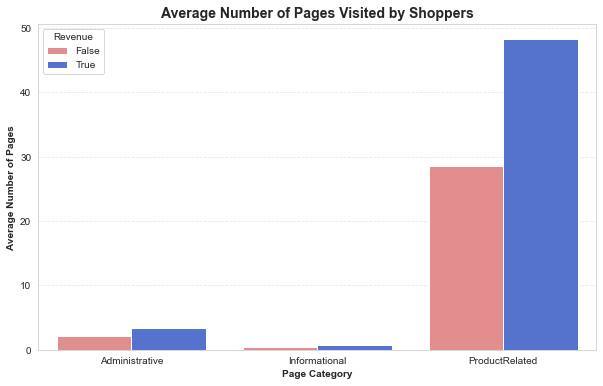

In [18]:
mean_pages_visited = data.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(mean_pages_visited.columns))

sns.barplot(data=mean_pages_visited.reset_index().melt('Revenue'), x='variable', y='value', hue='Revenue', palette=['lightcoral', 'royalblue'])

ax.set_xticks(x)
ax.set_xticklabels(mean_pages_visited.columns)
ax.set_title('Average Number of Pages Visited by Shoppers', fontsize=14, fontweight='bold')
ax.set_xlabel('Page Category', fontweight='bold')
ax.set_ylabel('Average Number of Pages', fontweight='bold')
ax.legend(title='Revenue', loc='upper left')
plt.show()

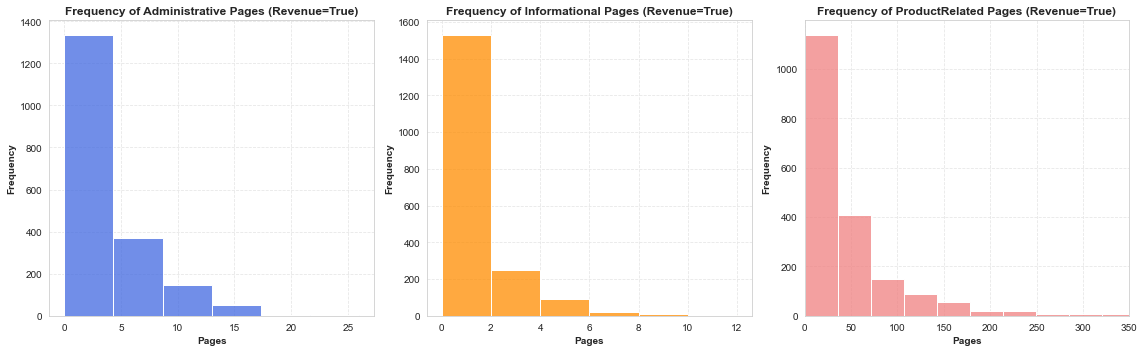

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 5))

revenue_data = data[data['Revenue'] == True]

#Administrative column
sns.histplot(revenue_data['Administrative'], bins=6, color='royalblue', ax=ax1)
ax1.set_xlabel('Pages', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Frequency of Administrative Pages (Revenue=True)', fontweight='bold')

#Informational column
sns.histplot(revenue_data['Informational'], bins=6, color='darkorange', ax=ax2)
ax2.set_xlabel('Pages', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Frequency of Informational Pages (Revenue=True)', fontweight='bold')

#ProductRelated column
sns.histplot(revenue_data['ProductRelated'], bins=15, color='lightcoral', ax=ax3)
ax3.set_xlim(0, 350)
ax3.set_xlabel('Pages', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Frequency of ProductRelated Pages (Revenue=True)', fontweight='bold')

plt.tight_layout()
plt.show()

#### How session duration impacts the purchase decisions?

The higher is the number of pages visited, the higher is the conversion rate. But we should note that the number of visitors decreases as the number of pages visited increases, with only 6.5% of visitors falling into the category of browsing 100+ pages. This suggests that there may be a correlation between browsing duration and purchasing intent. Visitors who spend more time on the website and explore a larger number of pages may have a higher likelihood of making a purchase.

To optimize conversions, it could be beneficial to focus on improving the user experience for visitors in the 21-100 pages browsing range, as they show relatively higher conversion rates compared to those in the lower page visit categories. Also some additional marketing strategies could be considered to encourage visitors to explore more pages and increase their engagement with the website, leading to higher conversion rates.


(0.0, 500.0)

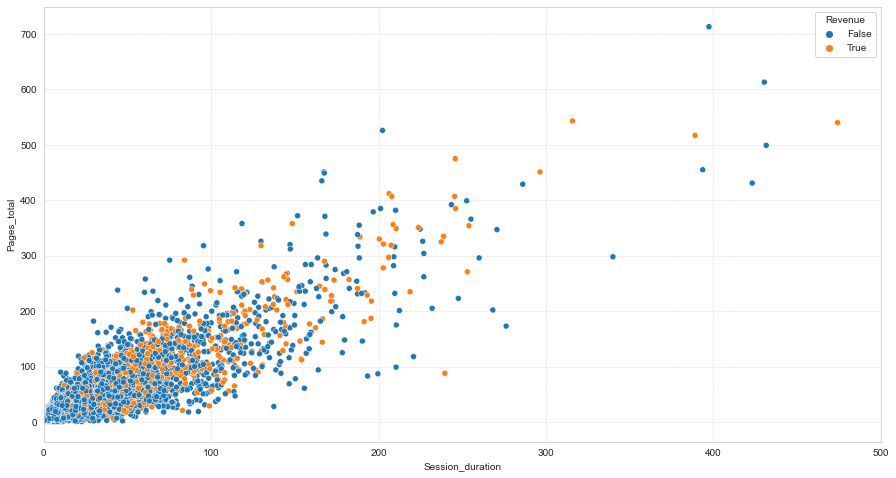

In [20]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x="Session_duration", y="Pages_total", hue='Revenue')
plt.xlim(0, 500)

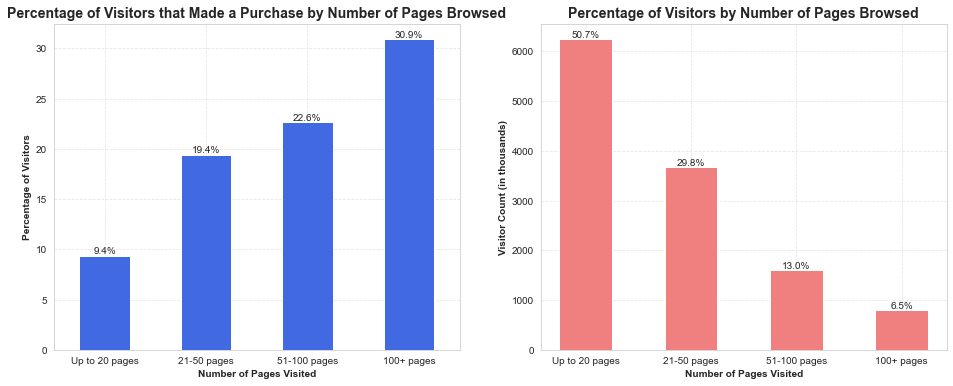

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

#1st plot
categories = ['Up to 20 pages', '21-50 pages', '51-100 pages', '100+ pages']
purchase_counts = data[data['Revenue'] == True].groupby(pd.cut(data['Pages_total'], bins=[0, 20, 50, 100, np.inf], labels=categories)).size()
visitor_counts = data.groupby(pd.cut(data['Pages_total'], bins=[0, 20, 50, 100, np.inf], labels=categories)).size()
purchase_percentage = (purchase_counts / visitor_counts) * 100
purchase_percentage.plot(kind='bar', ax=ax1, color='royalblue')

for i, bar in enumerate(ax1.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
    
ax1.set_xticklabels(categories, rotation=0)
ax1.set_title('Percentage of Visitors that Made a Purchase by Number of Pages Browsed', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Pages Visited', fontweight='bold')
ax1.set_ylabel('Percentage of Visitors', fontweight='bold')

#2nd plot
visitor_counts = data.groupby(pd.cut(data['Pages_total'], bins=[0, 20, 50, 100, np.inf], labels=categories)).size()
visitors_percentage = (visitor_counts / data.shape[0]) * 100
ax2.bar(visitors_percentage.index, visitor_counts, color='lightcoral', width=0.5)

for i, bar in enumerate(ax2.patches):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{visitors_percentage[i]:.1f}%', ha='center', va='bottom')

ax2.set_title('Percentage of Visitors by Number of Pages Browsed', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Pages Visited', fontweight='bold')
ax2.set_ylabel('Visitor Count (in thousands)', fontweight='bold')
plt.show()


#### How bounce rate and exit rate impact the purchase decisions?

The bounce rate represents the percentage of single-page visits in a session, while the exit rate indicates the percentage of page exits in relation to total visits. The key difference is that the exit rate considers all visitors in the last session, whereas bounce rates only include those in the one and only session, disregarding prior activity. A high bounce rate generally suggests that visitors did not find the content or user experience engaging enough to explore further. Unlike the bounce rate, the exit rate considers visitors who might have navigated through multiple pages before deciding to leave at some point.

Normally average bounce rates typically range from 25% to 40%, while our analysis shows rates mostly below 10%, which may look like a great result, but such exceptionally low bounce rates could indicate some issues, such as duplicate insertion of Google Analytics code or incorrect tracking implementation. It's important to double check it, and if after checking no errors are found, it indicates that our bounce rate is indeed healthy, but it's still worthwhile to explore optimization strategies for both bounce rates and exit rates to ensure saving sales and securing customer loyalty.

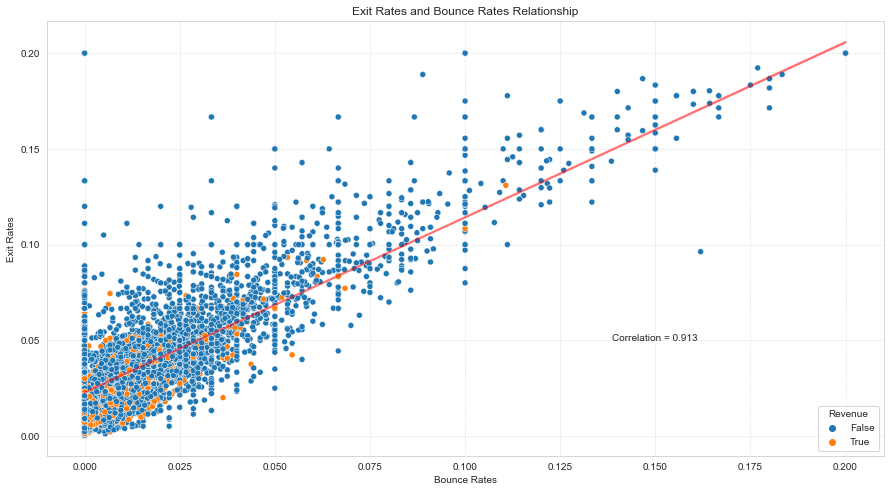

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=data, x='BounceRates', y='ExitRates', hue='Revenue', zorder=2)
sns.regplot(data=data, x='BounceRates', y='ExitRates', scatter=False, ci=95, line_kws={'alpha': 0.5}, color='red')
plt.title("Exit Rates and Bounce Rates Relationship")
plt.xlabel("Bounce Rates")
plt.ylabel("Exit Rates")
plt.text(0.15, 0.05, "Correlation = 0.913", ha='center')
plt.show()

## 4. Building a Prediction Model

Now we will build a machine learning model that helps to predict whether the user will complete a purchase. We will use the "Revenue" column as a target variable. We'll predict it with two algorithms: Logistic Regression and Random Forest, but firstly it's important to choose the right features for the model. I'll use the chi2 feature selection, that is used to measure the dependency between categorical variables.

We'll drop columns like "Seasonality" and "Month" because:
- We will need to create dummy variables for them (because they aren't quantitative) and they will create too many additional columns for us. 
- I want to focus more on clearly behavioural features of the customers.

"Average time" column will also not be included since we already have the columns that show us time on different page categories

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

data_ml = data.copy()
#Change types of some feature columns 
data_ml['Revenue'] = data_ml['Revenue'].astype(int)
data_ml['Weekend'] = data_ml['Weekend'].astype(int)
data_ml = pd.get_dummies(data_ml, columns=['VisitorType'], drop_first=False)

#Split the data
X = data_ml.drop(['Revenue', 'Seasonality', 'Month', 'Average_time'], axis=1)
y = data_ml['Revenue']

list_one = []
feature_ranking = SelectKBest(chi2)
feature_ranking.fit(X, y)
for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
df = pd.DataFrame(list_one)
df.sort_values(by=[0], ascending=False, inplace=True)
df

,0,1
8,175071.376528,PageValues
16,21146.613433,Pages_total
4,19656.135398,ProductRelated
15,16536.061464,Session_duration
5,15230.766972,ProductRelated_Duration
0,1140.350255,Administrative
1,726.980279,Administrative_Duration
3,620.475275,Informational_Duration
2,369.042474,Informational
19,115.224537,VisitorType_New_Visitor


We'll plot additionaly p-values for chi2 scores. A low p-value from the chi2 test indicates that there is strong evidence against the null hypothesis, suggesting that the feature is significantly associated with the target variable. 

I'll use the p-value threshold < 0.05. By selecting features with p-values lower than 0.05, we aim to include the most important features for the model.

According to the results, I'll exclude "Region", "TrafficType", "OperatingSystems", "VisitorType_Other", and "Info_Product" features from the feature set for our model.

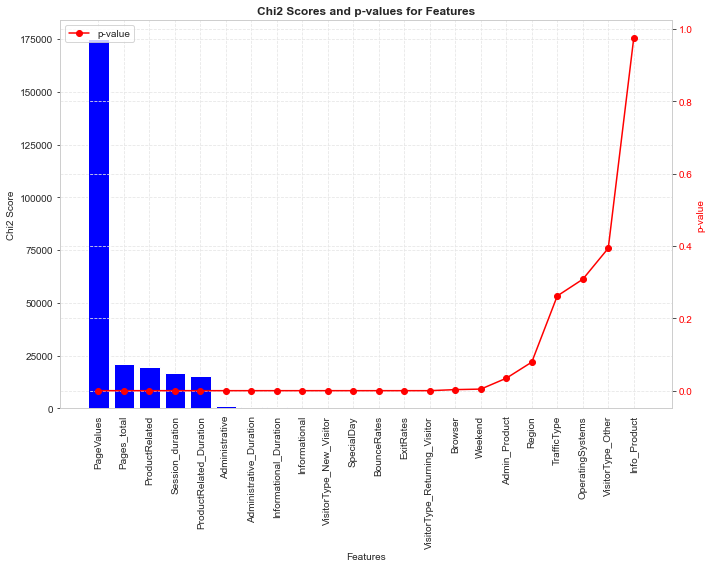

In [25]:

#chi2 scores and p-values for each feature
importance_scores = feature_ranking.scores_
p_values = feature_ranking.pvalues_

#create a DataFrame for scores
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores, 'p-value': p_values})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

#visualizing both the chi2 scores and the corresponding p-values for each feature
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(feature_df['Feature'], feature_df['Importance'], label='Chi2 Score', color='b')
ax.set_xlabel('Features')
ax.set_ylabel('Chi2 Score')
tick_positions = range(len(feature_df))
ax.set_xticks(tick_positions)
ax.set_xticklabels(feature_df['Feature'], rotation=90)
ax2 = ax.twinx()
ax2.plot(feature_df['Feature'], feature_df['p-value'], color='r', marker='o', label='p-value')
ax2.set_ylabel('p-value', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax.set_title('Chi2 Scores and p-values for Features', fontweight='bold')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### 4.1 Logistic Regression

To improve the model's performance on positive instances I will try to use the class weight to give more weight to the records where "Revenue==1". This is intended to help the model better capture the patterns and characteristics of the minority class, since it is underrepresented (only 20% of entries where "Revenue == 1"). I'll also add cross-validation for the better estimation of model performance and tune the hyperparameters with a grid search to find and apply the best parameter C for the optimal regularization.

In [356]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report


#Split
X = data_ml.drop(['Revenue', 'Seasonality', 'Month', 'Average_time','Region', 'TrafficType', "OperatingSystems", "VisitorType_Other", "Info_Product"], axis=1)
y = data_ml['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(class_weight={0: 1, 1:3}))
])

#hyperparameter grid to search
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'none'] 
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# The best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation
y_pred = best_model.predict(X_test_scaled)

# Accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_train = roc_auc_score(y_train, y_train_pred_probs)
roc_test = roc_auc_score(y_test, y_test_pred_probs)

print("Best Hyperparameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print("ROC AUC Score (Train):", roc_train)
print("ROC AUC Score (Test):", roc_test)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Best Hyperparameters: {'logistic__C': 0.001, 'logistic__penalty': 'none'}
Accuracy: 0.88
ROC AUC Score (Train): 0.9534931612383255
ROC AUC Score (Test): 0.9041033630446815
Confusion Matrix:
[[2406  192]
 [ 171  313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2598
           1       0.62      0.65      0.63       484

    accuracy                           0.88      3082
   macro avg       0.78      0.79      0.78      3082
weighted avg       0.88      0.88      0.88      3082



On the test dataset, our Logistic Regression model had an accuracy of 88%, meaning that it usually predicted the right result. However, when we look more closely at its performance indicators, we find certain imbalances.

The model does an acceptable job of distinguishing between positive and negative instances, but there is room for improvement, according to the ROC AUC score of 0.9041. With a precision of 0.62 for class 1 (visitors who made purchases), the model is about 62% accurate when making positive predictions, but class 1 only covers 65% of the positive entries. It also means that the model might overlook certain potential customers.

The precision and recall combined F1-score for class 1 is 0.63. This means that for this class, precision and recall should be about evenly distributed. The model performs very well in terms of macro-average F1-score (0.78) and weighted average F1-score (0.88), however it is still biased towards the dominant class (class 0).

#### 4.2. XGB

We'll also make a model with the help of XGBoost. It can capture non-linear relationships in the data, which is crucial in scenarios like e-commerce, where visitor behavior and purchase decisions are influenced by a multitude of factors that may not follow simple linear patterns, so it can potentially help us achieve better results.

In [367]:
import xgboost as xgb
import optuna
import warnings
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 2, 4),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 2, 6),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'lambda': trial.suggest_float('lambda', 0, 1),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 5),
        'max_delta_step': trial.suggest_float('max_delta_step', 0, 4),
        'subsample': trial.suggest_float('subsample', 0.1, 1)
    }
    
    # Create XGBoost classifier
    model = xgb.XGBClassifier(**params)
    
    # Train and evaluate the model
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Setting up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=75)

# The best hyperparameters and model
best_params = study.best_params
best_model = xgb.XGBClassifier(**best_params)

# Train and evaluate the best model
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Calculate prediction probabilities
y_train_pred_probs = best_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_probs = best_model.predict_proba(X_test_scaled)[:, 1]

roc_train = roc_auc_score(y_train, y_train_pred_probs)
roc_test = roc_auc_score(y_test, y_test_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print("ROC AUC Score (Train):", roc_train)
print("ROC AUC Score (Test):", roc_test)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Silence warnings
warnings.filterwarnings("ignore")

Best Hyperparameters: {'scale_pos_weight': 2.0089631576454567, 'learning_rate': 0.07041189867402459, 'max_depth': 4, 'colsample_bytree': 0.7354968507002796, 'colsample_bylevel': 0.6757206350214957, 'gamma': 0.5961110094837333, 'lambda': 0.8563132075692668, 'min_child_weight': 1.9643000002907107, 'max_delta_step': 3.5418406731731467, 'subsample': 0.7948079252877609}
Accuracy: 0.89
ROC AUC Score (Train): 0.9392619930639059
ROC AUC Score (Test): 0.9130803892377479
Confusion Matrix:
[[2391  207]
 [ 137  347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2598
           1       0.63      0.72      0.67       484

    accuracy                           0.89      3082
   macro avg       0.79      0.82      0.80      3082
weighted avg       0.90      0.89      0.89      3082



On the test dataset, the XGBoost model scored a little higher accuracy of 89%. A balanced ROC AUC score of 0.913 for this model also exists, showing good identifying between positive and negative events. The model also doesn't seem to be overfitted, which is a good sign.

This model performs better than our previous one, especially when we look at its precision and recall. The precision for class 1 (visitors who completed a purchase) is 0.63, meaning that when the model correctly predicts a purchase, it is correct around 63% of the time. Class 1 has a recall of 0.72, which indicates that 72% of the real purchase situations were recognized. This harmony of recall and precision suggests that the model is successful in identifying prospective customers, but there is a room for improvement.

In the context of optimizing marketing campaigns, the XGBoost model is promising as it performs well in capturing potential buyers without significantly sacrificing overall accuracy. 

### 5.0 Sum Up

#### TESTING SHIT

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data_ml = data.copy()

#Change types of some feature columns 
data_ml['Revenue'] = data_ml['Revenue'].astype(int)
data_ml['Weekend'] = data_ml['Weekend'].astype(int)
data_ml = pd.get_dummies(data_ml, columns=['VisitorType'], drop_first=True)

#Split the data
X = data_ml.drop(['Revenue', 'Seasonality', 'Month'], axis=1)
y = data_ml['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize the data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


In [78]:
data_ml[data_ml['Revenue'] == 1]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
65,3,1.463889,0,0.000000,27,13.305556,0.000000,0.012644,22.916036,0.8,...,1,Returning_Visitor,False,1,14.769444,30,0.000000,0.111111,0.492315,Winter
76,10,16.761111,0,0.000000,36,35.189028,0.004348,0.014493,11.439412,0.0,...,2,Returning_Visitor,False,1,51.950139,46,0.000000,0.277778,1.129351,Winter
101,4,1.016667,0,0.000000,19,10.116667,0.000000,0.026984,17.535959,1.0,...,4,Returning_Visitor,True,1,11.133333,23,0.000000,0.210526,0.484058,Winter
188,9,1.858333,1,0.808333,49,31.146995,0.000000,0.020709,1.706015,0.0,...,2,Returning_Visitor,False,1,33.813662,59,0.020408,0.183673,0.573113,Spring
196,2,0.933333,1,2.400000,67,42.729722,0.000000,0.005797,19.342650,0.0,...,2,New_Visitor,False,1,46.063056,70,0.014925,0.029851,0.658044,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,6,2.224444,0,0.000000,44,44.407431,0.002041,0.010884,97.860836,0.0,...,3,Returning_Visitor,True,1,46.631875,50,0.000000,0.136364,0.932637,Fall
12276,7,2.326250,0,0.000000,30,16.441667,0.000000,0.011429,36.392861,0.0,...,2,New_Visitor,False,1,18.767917,37,0.000000,0.233333,0.507241,Winter
12311,1,0.000000,2,3.520833,144,77.124826,0.001361,0.020664,0.000000,0.0,...,2,Returning_Visitor,False,1,80.645660,147,0.013889,0.006944,0.548610,Fall
12312,7,2.505952,1,0.150000,221,190.516687,0.011149,0.021904,1.582473,0.0,...,2,Returning_Visitor,True,1,193.172640,229,0.004525,0.031674,0.843549,Fall


In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your original DataFrame
# Make a copy of the dataset if you want to keep the original data unchanged
data_normalized = data.copy()

# Select only the numeric columns for normalization
numeric_columns = data.select_dtypes(include='number')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data to the [0, 1] range
data_normalized[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [122]:
# Separate the target variable 'Revenue' from the features
data_model = data.copy()
X = data_model.drop('Revenue', axis=1)
y = data_model['Revenue']

# Step 2: Train-Test Split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create copies of the datasets for normalization
#X_train_scaled = X_train.copy()
#X_test_scaled = X_test.copy()

# Step 4: Normalization using MinMaxScaler
# Create the MinMaxScaler object and fit_transform the training features
# Select only the numeric columns for normalization
numeric_columns = data_model.select_dtypes(include='number')
scaler = MinMaxScaler()
X_train[numeric_columns.columns] = scaler.fit_transform(X_train[numeric_columns.columns])

# Transform the test features using the fitted scaler from the training data
X_test[numeric_columns.columns] = scaler.transform(X_test[numeric_columns.columns])

# Step 5: Build the Logistic Regression Model
# Create the LogisticRegression object and fit it on the scaled training data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Step 6: Predictions
# Make predictions on the scaled test data
y_pred = logistic_model.predict(X_test)

# Step 7: Evaluation
# Calculate accuracy and print the classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

ValueError: could not convert string to float: 'Mar'

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your original DataFrame
# Make a copy of the dataset if you want to keep the original data unchanged
data_normalized = data.copy()

# Select only the numeric columns for normalization
numeric_columns = data.select_dtypes(include='number')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data to the [0, 1] range
data_normalized[numeric_columns.columns] = scaler.fit_transform(numeric_columns)

In [68]:
# Assuming you already have your data in the 'data' DataFrame
# X should contain the features (attributes) and y should contain the target variable (Revenue)
X = data[['Administrative', 'ProductRelated', 'BounceRates', 'ExitRates']]
y = data['Revenue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.83
Confusion Matrix:
[[2053    2]
 [ 407    4]]
Classification Report:
              precision    recall  f1-score   support

       False       0.83      1.00      0.91      2055
        True       0.67      0.01      0.02       411

    accuracy                           0.83      2466
   macro avg       0.75      0.50      0.46      2466
weighted avg       0.81      0.83      0.76      2466



In [69]:
# Assuming you already have your data in the 'data' DataFrame
# X should contain the features (attributes) and y should contain the target variable (Revenue)
X = data[['Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region']]
y = data['Revenue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.87
Confusion Matrix:
[[2005   50]
 [ 277  134]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.98      0.92      2055
        True       0.73      0.33      0.45       411

    accuracy                           0.87      2466
   macro avg       0.80      0.65      0.69      2466
weighted avg       0.85      0.87      0.85      2466



C:\Users\Liza\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
data

NameError: name 'data' is not defined

In [25]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
1,0,0.000000,0,0.0,2,1.066667,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,1.066667,2,0.0,0.000000,0.533333,Winter
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
3,0,0.000000,0,0.0,2,0.044444,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,0.044444,2,0.0,0.000000,0.022222,Winter
4,0,0.000000,0,0.0,10,10.458333,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,10.458333,10,0.0,0.000000,1.045833,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,2.416667,0,0.0,53,29.729861,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,32.146528,56,0.0,0.056604,0.574045,Winter
12326,0,0.000000,0,0.0,5,7.762500,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,7.762500,5,0.0,0.000000,1.552500,Fall
12327,0,0.000000,0,0.0,6,3.070833,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,3.070833,6,0.0,0.000000,0.511806,Fall
12328,4,1.250000,0,0.0,15,5.766667,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,7.016667,19,0.0,0.266667,0.369298,Fall


In [26]:
data.groupby(['OperatingSystems', 'Revenue']).sum()

Administrative  Administrative_Duration  \
OperatingSystems Revenue                                            
1                False              4566              2965.095750   
                 True               1190               729.920070   
2                False             11759              6157.561894   
                 True               3861              2273.831297   
3                False              4842              3250.653691   
                 True               1088               621.261745   
4                False               775               344.700188   
                 True                274               142.624876   
5                False                 1                 1.580000   
                 True                  3                 0.875556   
6                False                31                19.391481   
                 True                  8                 3.170833   
7                False                 8                 6.441667   
                 True                 17                11.635556   
8                False                89                63.232639   
                 True                 34                16.247222   

                          Informational  Informational_Duration  \
OperatingSystems Revenue                                          
1                False              973              971.210583   
                 True               302              355.369752   
2                False             2446             3052.849626   
                 True               883             1070.039270   
3                False             1140             1073.272808   
                 True               262              347.000318   
4                False              124              135.715278   
                 True                47               46.217361   
5                False                1                0.216667   
                 True                 0                0.000000   
6                False                9               11.470000   
                 True                 1                0.383333   
7                False                3                1.461667   
                 True                 1                0.150000   
8                False               13                5.837778   
                 True                 4               12.883333   

                          ProductRelated  ProductRelated_Duration  \
OperatingSystems Revenue                                            
1                False             46731             27963.745824   
                 True              14493              9387.738409   
2                False            182560            115778.915805   
                 True              60731             39508.855443   
3                False             55909             33488.234960   
                 True              11707              7825.294550   
4                False             12783              7703.421873   
                 True               4534              2512.209705   
5                False                57                47.918885   
                 True                 16                34.321667   
6                False               368               286.129743   
                 True                 38                33.597870   
7                False                57                34.431250   
                 True                 83                71.776873   
8                False               799               554.084111   
                 True                383               289.671237   

                          BounceRates   ExitRates    PageValues  SpecialDay  \
OperatingSystems Revenue                                                      
1                False      67.779382  113.459360   3895.809882       120.8   
                 True        2.207208    8.125873   9533.023168         6.8   
2                

In [27]:
test = data.groupby(['OperatingSystems', 'Revenue'])
df2 = pd.DataFrame(test)

df2

,0,1
0,"(1, False)",Administrative Administrative_Duration...
1,"(1, True)",Administrative Administrative_Duration...
2,"(2, False)",Administrative Administrative_Duration...
3,"(2, True)",Administrative Administrative_Duration...
4,"(3, False)",Administrative Administrative_Duration...
5,"(3, True)",Administrative Administrative_Duration...
6,"(4, False)",Administrative Administrative_Duration...
7,"(4, True)",Administrative Administrative_Duration...
8,"(5, False)",Administrative Administrative_Duration...
9,"(5, True)",Administrative Administrative_Duration ...


In [28]:
data.groupby('OperatingSystems').sum()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
OperatingSystems,,,,,,,,,,,,,,,,,,,,,
1,5756,3695.015820,1275,1326.580335,61224,37351.484233,69.986590,121.585233,13428.833050,127.6,...,9411,Returning_VisitorReturning_VisitorReturning_Vi...,739,379,42373.080388,68255,67.430137,358.464563,1550.522569,WinterWinterWinterWinterWinterWinterWinterWint...
2,15620,8431.393191,3329,4122.888896,243291,155287.771248,109.354574,256.513234,44828.182427,419.8,...,24419,Returning_VisitorReturning_VisitorReturning_Vi...,1236,1155,167842.053336,262240,125.875385,721.450442,4233.670646,WinterWinterWinterWinterWinterWinterWinterWint...
3,5930,3871.915437,1402,1420.273126,67616,41313.529510,84.666197,130.692100,8771.894760,183.0,...,13310,Returning_VisitorReturning_VisitorReturning_Vi...,752,268,46605.718072,74948,65.418836,331.643538,1582.071377,WinterWinterWinterWinterWinterWinterWinterWint...
4,1049,487.325064,171,181.932639,17317,10215.631578,5.881178,16.463575,3895.789320,21.8,...,1775,Returning_VisitorReturning_VisitorReturning_Vi...,122,85,10884.889281,18537,6.614919,43.288410,316.236997,WinterWinterWinterWinterWinterWinterWinterWint...
5,4,2.455556,1,0.216667,73,82.240552,0.078571,0.263492,26.188523,0.0,...,36,Returning_VisitorReturning_VisitorReturning_Vi...,1,1,84.912774,78,0.037037,0.354167,5.925288,FallFallSummerFallFallWinter
6,39,22.562315,10,11.853333,406,319.727613,0.702153,0.979892,164.594590,3.4,...,64,Returning_VisitorReturning_VisitorReturning_Vi...,4,2,354.143261,455,0.665328,1.957264,12.570646,SpringSpringSpringSpringSpringSpringSpringSpri...
7,25,18.077222,4,1.611667,140,106.208123,0.279510,0.472481,0.000000,1.2,...,14,Returning_VisitorNew_VisitorReturning_VisitorR...,3,1,125.897011,169,0.199548,0.869105,4.489954,SpringSpringSpringSpringFallFallFall
8,123,79.479861,17,18.721111,1182,843.755348,2.670948,4.117588,1499.066778,0.6,...,1149,Returning_VisitorOtherOtherReturning_VisitorNe...,11,17,941.956320,1322,4.814131,17.713862,60.776990,SpringSummerWinterFallFallWinterWinterWinterWi...


In [29]:
data[(data['SpecialDay'] != 0) & (data['Revenue'] == True)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
65,3,1.463889,0,0.000000,27,13.305556,0.000000,0.012644,22.916036,0.8,...,1,Returning_Visitor,False,True,14.769444,30,0.000000,0.111111,0.492315,Winter
101,4,1.016667,0,0.000000,19,10.116667,0.000000,0.026984,17.535959,1.0,...,4,Returning_Visitor,True,True,11.133333,23,0.000000,0.210526,0.484058,Winter
2108,0,0.000000,0,0.000000,12,14.941667,0.008333,0.025000,14.689500,0.6,...,5,Returning_Visitor,False,True,14.941667,12,0.000000,0.000000,1.245139,Spring
2122,3,0.450000,0,0.000000,21,14.966667,0.015385,0.042308,10.947231,0.6,...,3,Returning_Visitor,False,True,15.416667,24,0.000000,0.142857,0.642361,Spring
2178,3,7.180556,1,4.366667,49,38.976129,0.023529,0.028908,9.609529,0.6,...,4,Returning_Visitor,False,True,50.523352,53,0.020408,0.061224,0.953271,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,1,0.308333,0,0.000000,32,13.576786,0.000000,0.024020,3.111047,0.6,...,4,Returning_Visitor,False,True,13.885119,33,0.000000,0.031250,0.420761,Spring
5206,0,0.000000,0,0.000000,47,26.347222,0.000000,0.004255,3.663617,0.8,...,2,Returning_Visitor,False,True,26.347222,47,0.000000,0.000000,0.560579,Spring
5215,3,2.283333,4,3.650000,22,15.400000,0.007143,0.028571,29.902821,0.2,...,2,New_Visitor,False,True,21.333333,29,0.181818,0.136364,0.735632,Spring
5397,1,1.500000,1,0.566667,57,18.206071,0.000000,0.006322,19.115069,0.6,...,4,Returning_Visitor,False,True,20.272738,59,0.017544,0.017544,0.343606,Spring


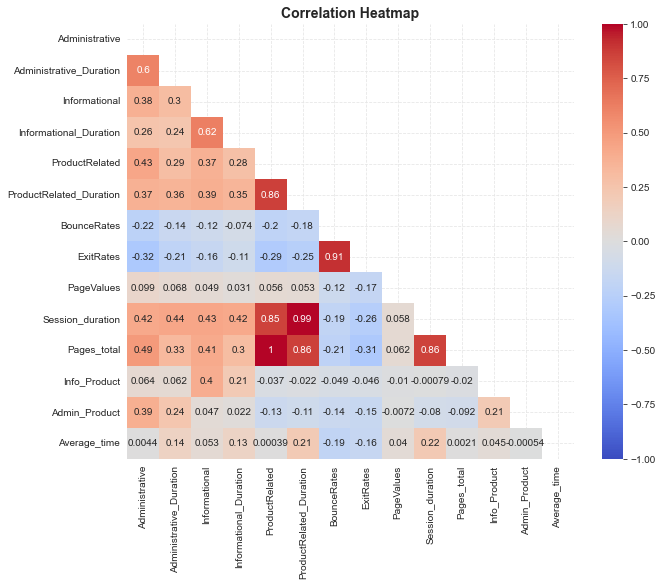

In [30]:
# Select the numeric columns from the data
columns = data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates',
                        'ExitRates','PageValues','Session_duration','Pages_total','Info_Product','Admin_Product','Average_time']]

# Compute the correlation matrix
correlation_matrix = columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

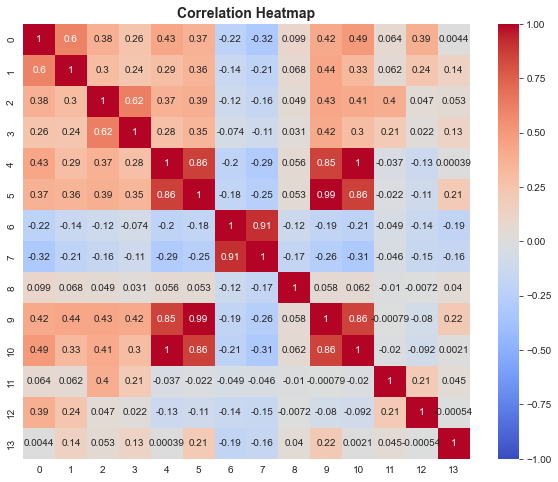

In [31]:
# Set the correlation threshold
threshold = 0.5

# Create a mask to hide weak correlations
mask = np.abs(correlation_matrix) < threshold
masked_matrix = np.ma.masked_array(correlation_matrix, mask)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(masked_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

In [32]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
1,0,0.000000,0,0.0,2,1.066667,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,1.066667,2,0.0,0.000000,0.533333,Winter
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
3,0,0.000000,0,0.0,2,0.044444,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,0.044444,2,0.0,0.000000,0.022222,Winter
4,0,0.000000,0,0.0,10,10.458333,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,10.458333,10,0.0,0.000000,1.045833,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,2.416667,0,0.0,53,29.729861,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,32.146528,56,0.0,0.056604,0.574045,Winter
12326,0,0.000000,0,0.0,5,7.762500,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,7.762500,5,0.0,0.000000,1.552500,Fall
12327,0,0.000000,0,0.0,6,3.070833,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,3.070833,6,0.0,0.000000,0.511806,Fall
12328,4,1.250000,0,0.0,15,5.766667,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,7.016667,19,0.0,0.266667,0.369298,Fall


In [33]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Session_duration           0
Pages_total                0
Info_Product               0
Admin_Product              0
Average_time               0
Seasonality                0
dtype: int64

In [34]:
data = data.replace([np.inf, -np.inf, np.nan], 0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Sure! Here's a project plan that covers the different stages of a typical data analysis project:

1. Business Understanding
1.1. Determine the business problem: What are the main goals of the e-commerce store? What are their current challenges, and how can data analysis help them solve these challenges?
1.2. Determine the stakeholders: Who will be involved in the project, and what are their roles?
1.3. Determine the project scope: What are the specific questions we want to answer with this analysis, and what are the expected outcomes?
1.4. Determine the success criteria: How will we measure the success of this project?

2. Data Preprocessing
2.1. Load the dataset into a Pandas dataframe.
2.2. Check for missing values, outliers, and inconsistencies in the data.
2.3. Remove duplicates, irrelevant columns, and rows with missing data.
2.4. Convert data types if necessary.
2.5. Create new features if necessary.

3. Data Exploration
3.1. Explore the distribution of each variable and their relationship with each other.
3.2. Analyze the descriptive statistics of each variable.
3.3. Identify the correlations between variables and the impact on the target variable (Revenue).
3.4. Identify any patterns or trends in the data.

4. Data Analysis
4.1. Build a baseline model to predict Revenue using all the variables.
4.2. Analyze the feature importance using different techniques (e.g., correlation, feature selection).
4.3. Build different models (e.g., logistic regression, decision tree, random forest, XGBoost) and compare their performance using cross-validation and other evaluation metrics.
4.4. Analyze the model results and identify the most significant factors that influence Revenue.

5. Data Visualization
5.1. Create visualizations that help communicate the results of the analysis.
5.2. Use different charts and graphs (e.g., histograms, scatter plots, box plots, heatmaps) to highlight patterns and trends in the data.
5.3. Create dashboards and interactive visualizations that allow users to explore the data and the results.

6. Conclusion
6.1. Summarize the findings and insights from the analysis.
6.2. Recommend actions based on the results to improve Revenue and customer experience.
6.3. Discuss limitations, assumptions, and potential improvements for the analysis.

7. Communication
7.1. Prepare a report with the analysis and the recommendations.
7.2. Present the findings to stakeholders and discuss the implications and next steps.
7.3. Provide documentation and code for reproducibility.

Business Questions

What are the most important factors that influence Revenue?
Which pages do visitors spend the most time on, and how does this affect their likelihood to make a purchase?
What is the average time spent by visitors on the website, and how does this vary by month, region, or other variables?
Which traffic sources generate the most Revenue, and how can we optimize our marketing efforts?
What is the impact of special days (e.g., holidays, promotions) on Revenue and visitor behavior?
What is the conversion rate (i.e., the percentage of visitors who make a purchase), and how does it vary by visitor type, operating system, or other variables?
How do visitors behave on weekends versus weekdays, and how does this affect Revenue?
What is the impact of seasonality (i.e., different times of the year) on visitor behavior and Revenue?
How can we use the data to personalize the website experience and improve customer satisfaction?
How can we use the data to predict




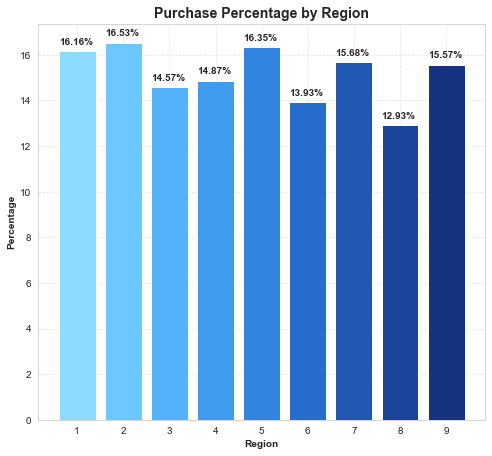

In [36]:
my_palette = sns.cubehelix_palette(start=30, rot=-0.15, gamma=1.5, hue=2, light=0.85, dark=0.15, n_colors=12)
my_palette = sns.color_palette(my_palette, 15)
counts = visitors.groupby(['Region', 'Revenue']).size().unstack()
percentages = (counts.iloc[:,1] / counts.sum(axis=1)) * 100

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(percentages.index, percentages, color=my_palette)
for i, v in enumerate(percentages):
    ax.text(i+0.6, v+0.4, f'{v:.2f}%', va='center', fontweight='bold')

ax.set_title('Purchase Percentage by Region', fontsize=14, fontweight='bold')
ax.set_xlabel('Region', fontweight='bold')
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.subplots_adjust(wspace=0.4, top=1.5)
plt.show()

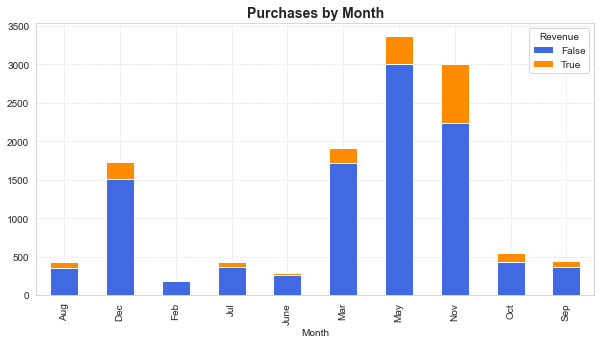

In [37]:
my_palette = sns.cubehelix_palette(start=255, rot=-0.15, gamma=1.5, hue=3, light=0.85, dark=0.15, n_colors=15)
data.groupby('Month')['Revenue'].value_counts().unstack('Revenue').plot(kind='bar', stacked=True, figsize=(10, 5), color=['royalblue', 'darkorange'])
plt.title('Purchases by Month',  fontsize=14, fontweight='bold')
plt.show()

In [38]:
my_palette = sns.cubehelix_palette(start=255, rot=-0.15, gamma=1.5, hue=3, light=0.85, dark=0.15, n_colors=15)
sns.set_style("white")
sns.set(style='white', rc={'axes.grid': False, 'axes.edgecolor': 'white'})
sns.set_theme()

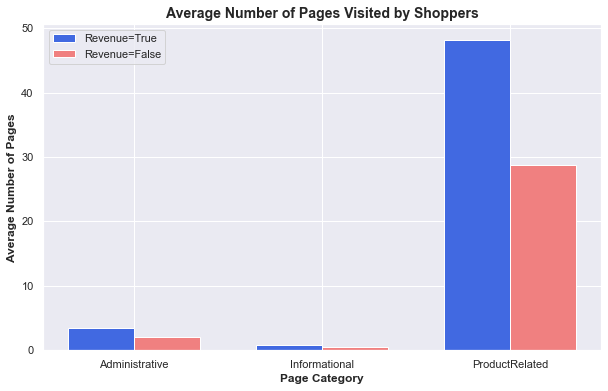

In [39]:
# Filter data for completed purchases
completed_purchases = data[data['Revenue'] == True]
non_completed_purchases = data[data['Revenue'] == False]

# Calculate the mean number of pages visited for each category
mean_pages_visited_completed = completed_purchases[['Administrative', 'Informational', 'ProductRelated']].mean()
mean_pages_visited_non_completed = non_completed_purchases[['Administrative', 'Informational', 'ProductRelated']].mean()

# Set the colors for each product page category

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Set the x positions for the bars
x = range(len(mean_pages_visited_completed))

# Plot the grouped bars for completed purchases
ax.bar(x, mean_pages_visited_completed, width=bar_width, color='royalblue', label='Revenue=True')

# Plot the grouped bars for non-completed purchases
ax.bar([i + bar_width for i in x], mean_pages_visited_non_completed, width=bar_width, color='lightcoral', label='Revenue=False')

# Set the x-axis labels
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(mean_pages_visited_completed.index)

# Set the title and labels
plt.title('Average Number of Pages Visited by Shoppers', fontsize=14, fontweight='bold')
plt.xlabel('Page Category', fontweight='bold')
plt.ylabel('Average Number of Pages', fontweight='bold')

# Add a legend
plt.legend()

# Show the plot
plt.show()

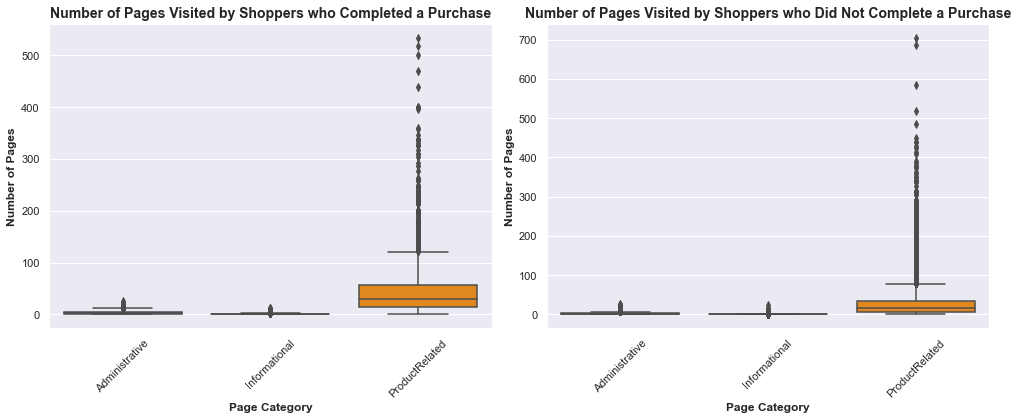

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6))

# 1st subplot
completed_purchases = data[data['Revenue'] == True]
boxplot_data1 = completed_purchases[['Administrative', 'Informational', 'ProductRelated']]

sns.boxplot(data=boxplot_data1, ax=ax1, palette=['royalblue', 'red', 'darkorange'])
ax1.set_title('Number of Pages Visited by Shoppers who Completed a Purchase', fontsize=14, fontweight='bold')
ax1.set_xlabel('Page Category', fontweight='bold')
ax1.set_ylabel('Number of Pages', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# 2nd subplot
no_purchase = data[data['Revenue'] == False]
boxplot_data2 = no_purchase[['Administrative', 'Informational', 'ProductRelated']]

sns.boxplot(data=boxplot_data2, ax=ax2, palette=['royalblue', 'red', 'darkorange'])
ax2.set_title('Number of Pages Visited by Shoppers who Did Not Complete a Purchase', fontsize=14, fontweight='bold')
ax2.set_xlabel('Page Category', fontweight='bold')
ax2.set_ylabel('Number of Pages', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [41]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,Session_duration,Pages_total,Info_Product,Admin_Product,Average_time,Seasonality
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
1,0,0.000000,0,0.0,2,1.066667,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,1.066667,2,0.0,0.000000,0.533333,Winter
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.000000,1,0.0,0.000000,0.000000,Winter
3,0,0.000000,0,0.0,2,0.044444,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,0.044444,2,0.0,0.000000,0.022222,Winter
4,0,0.000000,0,0.0,10,10.458333,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,10.458333,10,0.0,0.000000,1.045833,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,2.416667,0,0.0,53,29.729861,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,32.146528,56,0.0,0.056604,0.574045,Winter
12326,0,0.000000,0,0.0,5,7.762500,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,7.762500,5,0.0,0.000000,1.552500,Fall
12327,0,0.000000,0,0.0,6,3.070833,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,3.070833,6,0.0,0.000000,0.511806,Fall
12328,4,1.250000,0,0.0,15,5.766667,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,7.016667,19,0.0,0.266667,0.369298,Fall


In [42]:
data.Session_duration.max()

1165.3607871666668

In [121]:
pip install scikit-optimize

     ------------------------------------ 100.3/100.3 KB 957.7 kB/s eta 0:00:00
     -------------------------------------- 157.3/157.3 KB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

data_ml = data.copy()
#Change types of some feature columns 
data_ml['Revenue'] = data_ml['Revenue'].astype(int)
data_ml['Weekend'] = data_ml['Weekend'].astype(int)
data_ml = pd.get_dummies(data_ml, columns=['VisitorType'], drop_first=False)

#Split the data
X = data_ml.drop(['Revenue', 'Seasonality', 'Month', 'Average_time'], axis=1)
y = data_ml['Revenue']

list_one = []
feature_ranking = SelectKBest(f_classif)
feature_ranking.fit(X, y)
for i, (score, feature) in enumerate(zip(feature_ranking.scores_, X.columns)):
    list_one.append((score, feature))
    
df = pd.DataFrame(list_one)
df.sort_values(by=[0], ascending=False, inplace=True)
df

In [ ]:
from skopt import BayesSearchCV

# Split the data (assuming you have already done this)
# X_train, X_test, y_train, y_test = ...

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Define the hyperparameter search space for Bayesian Optimization
param_space = {
    'logistic__C': (0.001, 100.0, 'log-uniform'),  # Range for C with log-uniform sampling
}

# Perform Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(
    pipeline,
    param_space,
    cv=5,
    n_iter=100,  # Number of iterations (you can increase it for more search iterations)
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

# Fit the model with Bayesian Optimization
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = bayes_search.best_params_
best_model = bayes_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the pipeline with MinMaxScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Perform cross-validation with 5 folds and use 'accuracy' as the scoring metric
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean_score = np.mean(cv_scores)
cv_std_score = np.std(cv_scores)

print(f'Cross-Validation Accuracy: {cv_mean_score:.2f} +/- {cv_std_score:.2f}')